In [ ]:
!pip install rasa==1.10.3

     |████████████████████████████████| 510 kB 13.5 MB/s 
     |████████████████████████████████| 174 kB 76.5 MB/s 
     |████████████████████████████████| 979 kB 56.7 MB/s 
     |████████████████████████████████| 60 kB 5.8 MB/s 
     |████████████████████████████████| 131 kB 88.6 MB/s 
     |████████████████████████████████| 111 kB 66.4 MB/s 
     |████████████████████████████████| 1.3 MB 62.0 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 266 kB 62.8 MB/s 
     |████████████████████████████████| 417 kB 74.1 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 282 kB/s 
     |████████████████████████████████| 72 kB 479 kB/s 
     |████████████████████████████████| 96 kB 6.4 MB/s 
     |████████████████████████████████| 3.2 MB 26.0 MB/s 
     |████████████████████████████████| 1.2 MB 65.1 MB/s 
     |████████████████████████████████| 149 kB 71.2 MB/s 
     |████████████████████

In [ ]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 14.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
!pip install nest_asyncio==1.3.3

  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.4
    Uninstalling nest-asyncio-1.5.4:
      Successfully uninstalled nest-asyncio-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.9 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [ ]:
import os
import rasa 
import nest_asyncio

nest_asyncio.apply()

print("event loop ready")

event loop ready


In [ ]:
from rasa.cli.scaffold import create_initial_project

In [ ]:
project = 'test_project'
create_initial_project(project)

In [ ]:
os.chdir(project)
print(os.listdir("."))

['__pycache__', 'tests', 'credentials.yml', 'actions.py', 'endpoints.yml', 'data', '__init__.py', 'domain.yml', 'config.yml']


In [ ]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"

print(config, training_files, domain, output)

config.yml data/ domain.yml models/


In [ ]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 173.75it/s, # actions=16]
Processed actions: 16it [00:00, 990.70it/s, # examples=16]
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:11<00:00,  9.00it/s, t_loss=0.093, loss=0.022, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:12<00:00,  7.72it/s, t_loss=1.575, i_loss=0.191, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test_project/models/20211227-092530.tar.gz'.
models/20211227-092530.tar.gz


In [ ]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
/stop


In [ ]:
%%writefile data/nlu.md


## intent check_in
- What are your check-in timings?
- check-in timings of your hotel is?
- can you tell me the check-in timing of your hotel?
- Is there any check-in timing of hotel?

## intent:check_out
- What are your check-out timings?
- check-out timings of your hotel is?
- can you tell me the check-out timing of your hotel?
- Is there any check-out timing of hotel?

## intent:cancel_resr
- How do I cancle a reservation?
- Procedure of cancle a hotel?
- Please cancle my reservation.
- Can you please cancle my reservation?

## intent: can_policy
- What is your cancellation policy?
- Can you tell me about the cancellation policy of your hotel?
- Cancellation policy of your hotel?
- Is there any cancellation policy of your hotel?
- Cancellation policy of your hotel?

## intent: restaurant
- Does the hotel have a restaurant
- Is there any restaurant
- Any facilities of restaurant in hotel?
- Any restaurant in hotel?
- did any restaurant in hotel ?

## intent: breakfast
- Does the hotel offer breakfast ?
- Any idea about breakfast offer by hotel?
- Any complementary breakfast offer by hotel?
- Breakfast offer by hotel?
- Breakfast provided by hotel?

## intent:break_time
- What are the breakfast timings?
- Is there any breakfast timings?
- Can you tell me the breakfast timing of hotel?
- breakfast timings?
- What is the breakfast timings of the hotel?

## intent: rest_time:
- What are the timings of your restaurant?
- Is there any timing of your restaurant ?
- timings of your restaurant ?
- Can you tell me the restaurant timing of your hotel?

## intent:clean_now
- can you send someone right now for cleaning
- send someone right now
- right now please
- i prefer right now
- please clean my room rightnow.

## intent:clean
- i want to clean my room
- can you send somebody to clean my room
- can you send room serive to clean my room
- send someone to clean my room


## intent:deluxe
- i need deluxe room
- i want deluxe room
- deluxe room
- i am looking for deluxe room
- can i get the deluxe rooms

## intent:simple
- i need simple room
- i want simple room
- simple room
- i am looking for simple room
- can i get the simple rooms

## intent:num_room

- I need [2](number) rooms
- is [2](number) room available
- [4](number) rooms
- can i get the [3](number) rooms
- I want [3](number) rooms.

## intent:book_room
- I want to book a room
- I need a room.
- I am looking for a room.
- is room empty.
- book a room for a night.


## intent:greet
- hey
- hello
- hi
- good morning
- good evening
- hey there

## intent:goodbye
- bye
- goodbye
- see you around
- see you later

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- wonderful
- I am feeling very good
- I am great
- I'm good

## intent:mood_unhappy
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not very good
- extremely sad
- so sad

## intent:bot_challenge
- are you a bot?
- are you a human?
- am I talking to a bot?
- am I talking to a human?


Overwriting data/nlu.md


In [ ]:
%%writefile domain.yml

intents:
  - greet
  - goodbye
  - affirm
  - deny
  - mood_great
  - mood_unhappy
  - bot_challenge
  - buy
  - book_room
  - num_room
  - simple
  - deluxe
  - clean
  - clean_now
  - check_in
  - check_out
  - cancel_resr
  - can_policy
  - restaurant
  - breakfast
  - break_time
  - rest_time

entities:
  - number

responses:

  utter_can_policy:
  - text: "The booking deposit is refundable if the cancellation occurs at least 15 days before arrival. For cancellations made after this limit."

  utter_restaurant:
  - text: "Yes, the hotel has a restaurant called the Inno Bar, with our menu we strive to reflect the historic art and the spirit of our neighborhood."

  utter_breakfast:
  - text: "The hotel provides its guests with a free made-to-order breakfast each morning."

  utter_break_time:
  - text: "Monday through Friday breakfast is 6 AM to 9 AM . On Saturday and Sunday, we are open from 7:AM to 10:30 AM."

  utter_rest_time:
  - text: "Our restaurant serves a dazzing 24-hour menu"

  utter_check_in:
  - text: "Check-in time starts at 4 PM. Minimum  check-in age is 21. Please contact the reception for early check-in requests."

  utter_check_out:
  - text: "Check-out time is 11 AM, please contact the reception for late checkout request"

  utter_cancel_resr:
  - text: "To cancle a reservation, select the 'Reservations' link from the homepage"

  utter_clean_now:
  - text: "Sure, I will send someone to your room right now."

  utter_clean:
  - text: "When should i arrange the cleaning?"

  utter_deluxe:
  - text: "You hav choosen to book a deluxe rooms."

  utter_simple:
  - text: "You hav choosen to book a simple rooms."


  utter_num_room:
  - text: "What type of room would you want to book - simple room or deluxe room ?"


  utter_book_room:
  - text: "How many room would you like to book?"

  utter_greet:
  - text: "Hey! How are you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: "Great, carry on!"

  utter_goodbye:
  - text: "Bye"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa."

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: True


Overwriting domain.yml


In [ ]:
%%writefile data/stories.md

## check in
* greet
  - utter_greet
* check_in
  - utter_check_in

## check in
* greet
  - utter_greet
* check_in
  - utter_check_out

## cancle reservation
* greet
  - utter_greet
* cancel_resr
  - utter_cancel_resr

## policy
* greet
  - utter_greet
* can_policy
  - utter_can_policy

## restaurant details
* greet
  - utter_greet
* restaurant
  - utter_restaurant

## breakfast
* greet
  - utter_greet
* breakfast
  - utter_breakfast

## breakfast timing
* greet 
  - utter_greet
* break_time
  - utter_break_time

## restaurant timings
* greet
  - utter_greet
* rest_time
  - utter_rest_time

## clean my room
* greet
  - utter_greet
* clean
  - utter_clean
* clean_now
  - utter_clean

## booking simple room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* simple
  - utter_simple

## booking deluxe room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* duluxe
  - utter_deluxe


## happy path
* greet
  - utter_greet
* mood_great
  - utter_happy

## sad path 1
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* deny
  - utter_goodbye

## say goodbye
* goodbye
  - utter_goodbye

## bot challenge
* bot_challenge
  - utter_iamabot


Overwriting data/stories.md


In [ ]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

/usr/local/lib/python3.7/dist-packages/rasa/core/training/dsl.py:431: UserWarning: Found unknown intent 'duluxe' on line 75. Please, make sure that all intents are listed in your domain yaml.
  docs=DOCS_URL_DOMAINS,
Processed Story Blocks:   0%|          | 0/16 [00:00<?, ?it/s, # trackers=16]

Training Core model...


Processed trackers: 100%|██████████| 16/16 [00:00<00:00, 166.25it/s, # actions=44]
Processed actions: 44it [00:00, 878.24it/s, # examples=42]
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:46<00:00,  2.13it/s, t_loss=0.374, loss=0.262, acc=0.982]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/nlu/classifiers/diet_classifier.py:595: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for tag_name, tag_ids in tag_name_to_tag_ids.items()
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:36<00:00,  2.71it/s, t_loss=3.012, i_loss=1.325, entity_loss=0.010, i_acc=0.981, entity_f1=0.921]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test_project/models/20211227-102200.tar.gz'.
models/20211227-102200.tar.gz


In [ ]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
i want a room
How many room would you like to book?
2
What type of room would you want to book - simple room or deluxe room ?
deluxe
You hav choosen to book a deluxe rooms.
y
Bye
yes
Great, carry on!
clean
When should i arrange the cleaning?
/stop


In [ ]:
import rasa.data as data

stories_directory, nlu_directory = data.get_core_nlu_directories(training_files)

print(stories_directory, nlu_directory)

/tmp/tmpzk123t_h /tmp/tmp_9mnnqh0


/usr/local/lib/python3.7/dist-packages/rasa/core/training/dsl.py:431: UserWarning: Found unknown intent 'duluxe' on line 75. Please, make sure that all intents are listed in your domain yaml.
  docs=DOCS_URL_DOMAINS,
100%|██████████| 103/103 [00:00<00:00, 113.20it/s]


Done testing..


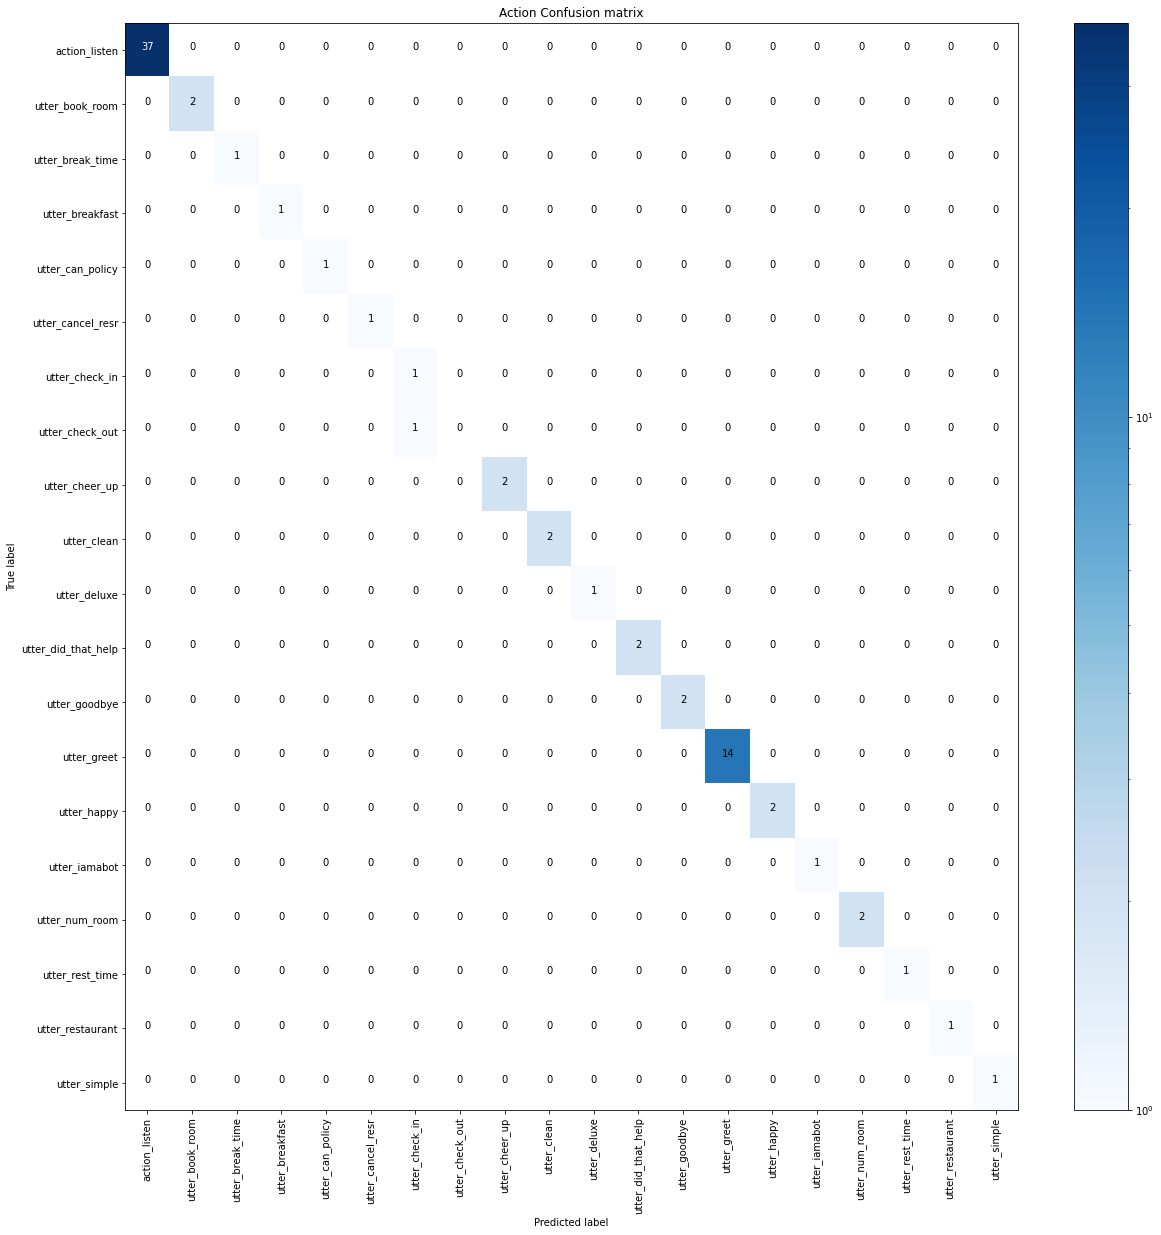

In [ ]:
rasa.test(model_path, stories_directory, nlu_directory)

print("Done testing..")